<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/04_NLP%20Projects/Transfer%20Learning%20(Bert%2C%20T5%2C%20LLaMa%2C%20etc..%20(transformers)/Sentiment%20Analysis/Sentiment_Analysis_using_Vaders_and_Roberta_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

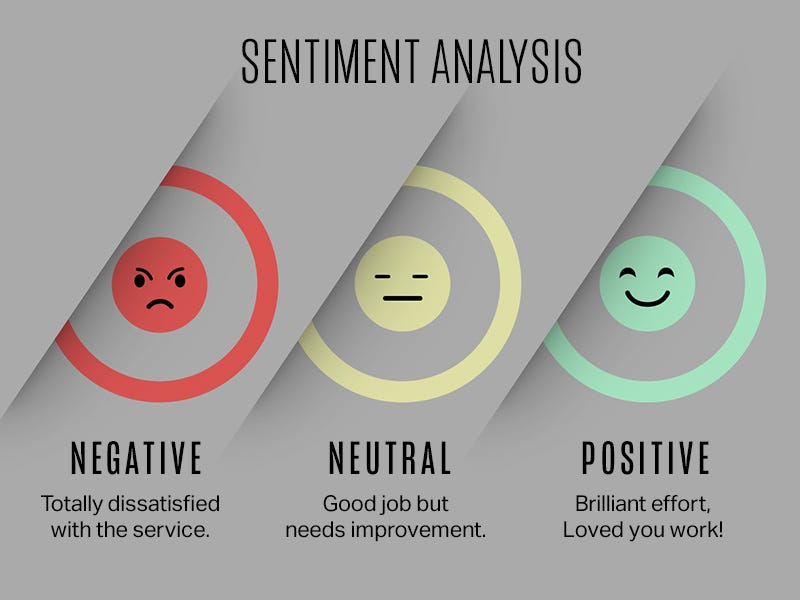
#**Project Summary: Sentiment Analysis on Disneyland Reviews  Using VADER and Roberta Pre-trained model**

##**Overview**

This project applies the VADER and Roberta to classify customer feedback from the Disneyland Reviews dataset (Kaggle). After preprocessing the review text, both VADER and Roberta effectively categorized each review into positive, neutral, or negative sentiment, capturing both polarity and intensity with strong consistency and interpretability.


---

#**Aim of the Project**

To analyze customer opinions and detect sentiment patterns without the need for heavy model training.

To demonstrate how VADER and Roberta can deliver fast, actionable sentiment insights from large review datasets.

##**Importing Libraries**

In [ ]:
import transformers
import tensorflow as tf
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
import nltk

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DisneylandReviews.csv", encoding="latin1")
df.head()

##**Load Dataset from Google drive**

##**Data cleaning: Confirming to know if there is null and duplicate values**

In [ ]:
print(f"Columns with num values on dataset: {df.isna().sum()}")
print("\n")
print(f"Columns with duplicate values on dataset: {df.duplicated().sum()}")

In [ ]:
df = df[:4000]

##**Viewing number of counts for each Rating**

In [ ]:
df.Rating.value_counts()

##**Bar_Chart Representation**

In [ ]:
df.Rating.value_counts().sort_index() \
.plot(kind="bar", title= "Count of reviews by stars", figsize=(10,5))
plt.xlabel("Rating Stars")
plt.ylabel("Counts")
plt.show()

##**Creating example from my dataset**

In [ ]:
example = df['Review_Text'][60]
example

##**Preparing sentiment model from nltk to analyze text into category**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia

##**Testing polarity score on example**

In [ ]:
sia.polarity_scores(example)

##**Running Sia model on my main Text data's iterating through all**.
 Progress bar was used to monitor progress.

In [ ]:
res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row["Review_Text"]
  ids = row["Review_ID"]
  res[ids] = sia.polarity_scores(text)

##**Merging varders result with dataframe**

In [ ]:
Vaders = pd.DataFrame(res).T
Vaders = Vaders.merge(df, left_index=True, right_on='Review_ID', how="left")
Vaders

##**Bar_chart of what Vaders compound represents**

In [ ]:
sns.barplot(data=Vaders, x="Rating", y="compound", palette="viridis")
plt.title("Compound score by Disneyland star reviews")
plt.show()
print("\n")
print("What this Means")
print("Negative reviews has low compound score (eg: Rating 1,2,3) \n And Positive reviews has high compound score(eg. Rating 4,5)")
print("\n")

##**Visualizing them by negative, neutral and positive reviews**

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.barplot(data=Vaders, x="Rating", y="neg", ax = axs[0], palette="viridis")
sns.barplot(data=Vaders, x="Rating", y="neu", ax = axs[1], palette="plasma")
sns.barplot(data=Vaders, x="Rating", y="pos", ax = axs[2], palette="magma")
axs[0].set_title("Negative score by Amazon star reviews")
axs[1].set_title("Neutral score by Amazon star reviews")
axs[2].set_title("Positive score by Amazon star reviews")
plt.tight_layout()
plt.show()

##**As you can see Negative goes downwards, neural try to maintain its level while positive goes upward**

##**Result:** Take note Scores grater than 0.5 are positive and scores below 0.5 are either neutral or negative reviews 👍

In [ ]:
Vaders_result = Vaders[["compound", "Rating", "Review_Text"]]
print(Vaders_result)

##**Using Roberta Pre-trained model**

In [ ]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

##**Implementing pre-trained model into model and tokenizer**

In [ ]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
df = df[:100]

In [ ]:
from scipy.special import softmax
import torch

def roberta_score(example):
  input = tokenizer(example, truncation=True, padding=True, max_length=512, return_tensors="pt")
  with torch.no_grad():
    output = model(**input)
  output = output[0][0].detach().numpy()
  score = softmax(output)

  rob_dict = {"Roberta_neg": score[0],
              "Roberta_neu": score[1],
              "Roberta_pos": score[2],
              }

  return rob_dict

##**Comparing both Sia and Roberta Pre-trained model performance on my example.**

polarity_score👇

In [ ]:
sia.polarity_scores(example)

Roberta score👇

In [ ]:
roberta_score(example)

##**As we see from above both model are positive but Roberta Pre-trained got a high confidence**

##**Running Roberta model on my df iterating through all text reviews**.

In [ ]:
res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row["Review_Text"]
  ids = row["Review_ID"]
  res[ids] = roberta_score(text)

In [ ]:
roberta = pd.DataFrame(res).T
roberta = roberta.merge(df, left_index=True, right_on='Review_ID', how="left")
roberta.head()

#**Conclusion**

When deployed, this sentiment analysis system can:

Automatically score customer reviews and label their sentiment in real time.

Support e-commerce platforms, product analytics dashboards, and customer feedback systems.

Help businesses monitor brand perception, detect dissatisfaction, and understand user experiences at scale.


The project highlights VADER as a lightweight but powerful tool for sentiment interpretation in real-world review data.
